In [1]:
import os
import sys
import numpy as np
import pandas as pd
from copy import deepcopy, copy

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import torch

from tqdm import tqdm

project_dir = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(project_dir)
from raw_data_processing import get_x, get_y, get_wavelength
from tools import JSON_Read, plotly_multi_scatter
from tools import KAN_es_2 as KAN_es
from tools import get_df4bar

SCRIPT_DIR = os.path.abspath('')

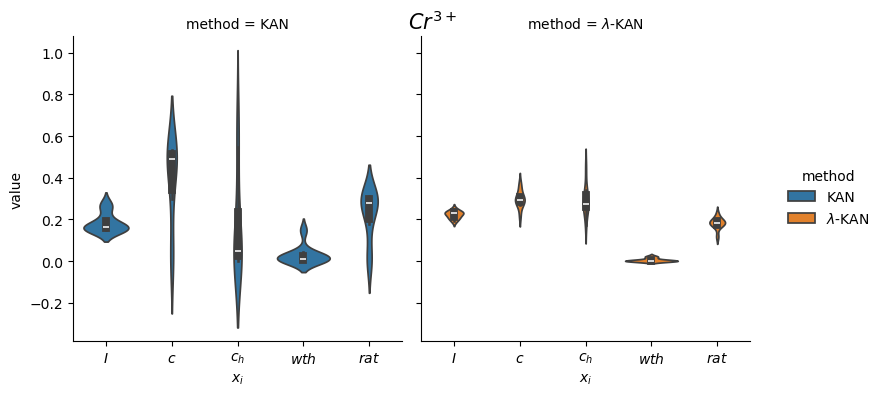

In [2]:
l_feature_scores_kan = np.array([[6.0210639e-01, 8.9232820e-01, 8.7593758e-01, 8.2447492e-02,
        5.3051436e-01],
       [6.7947447e-01, 2.2105284e+00, 1.1786424e-01, 1.4803364e-02,
        1.2807994e+00],
       [5.3816414e-01, 5.9802227e-02, 1.1337755e+00, 3.0771586e-01,
        3.1209107e-02],
       [6.4303452e-01, 2.2527752e+00, 1.2332922e-07, 4.3388207e-02,
        1.3087881e+00],
       [6.3544905e-01, 1.8554279e+00, 2.6705673e-01, 4.8420772e-02,
        1.0783247e+00],
       [5.7153761e-01, 1.8309712e-02, 1.4564300e+00, 5.2004069e-02,
        1.0704357e-05],
       [6.6271901e-01, 1.9535785e+00, 2.7057582e-01, 1.8733921e-02,
        1.1296229e+00],
       [6.2800229e-01, 1.9381448e+00, 9.9571019e-02, 1.6500235e-01,
        1.1094435e+00],
       [6.6397840e-01, 2.1674166e+00, 9.9062294e-02, 4.0158514e-02,
        1.2580760e+00],
       [6.5832418e-01, 2.3106482e+00, 9.8622544e-04, 1.1770051e-02,
        1.3441906e+00]])

l_feature_scores_kan = np.abs(l_feature_scores_kan)
l_feature_scores_kan = l_feature_scores_kan/l_feature_scores_kan.sum(axis=1, keepdims=True)


l_feature_scores_lmdkan = np.array([[ 7.0922893e-01,  9.3122101e-01,  7.6582515e-01, -1.1754523e-03,
         6.0164028e-01],
       [ 8.8246572e-01,  1.1411180e+00,  1.1098226e+00, -2.9486371e-02,
         6.8384373e-01],
       [ 7.1077883e-01,  8.3763367e-01,  1.0088986e+00, -3.0893402e-04,
         5.3045619e-01],
       [ 7.0264274e-01,  7.1734989e-01,  1.4728643e+00, -2.9585935e-06,
         3.8616616e-01],
       [ 6.0870361e-01,  8.1118202e-01,  7.3189723e-01, -2.4959235e-03,
         5.0250947e-01],
       [ 5.8448720e-01,  8.9587080e-01,  1.0441976e+00, -2.5111143e-03,
         5.3496039e-01],
       [ 7.5990921e-01,  1.2537390e+00,  8.8732606e-01, -2.2501308e-03,
         7.0490438e-01],
       [ 6.6352630e-01,  7.9822046e-01,  7.6130962e-01, -5.1601544e-02,
         5.1115078e-01],
       [ 6.0140741e-01,  6.8071687e-01,  6.6243720e-01, -8.6197508e-03,
         4.4668561e-01],
       [ 4.4072193e-01,  8.0382478e-01,  3.8026351e-01, -5.0704788e-02,
         4.9056369e-01]])

l_feature_scores_lmdkan = np.abs(l_feature_scores_lmdkan)
l_feature_scores_lmdkan = l_feature_scores_lmdkan/l_feature_scores_lmdkan.sum(axis=1, keepdims=True)


df_kan = get_df4bar(l_feature_scores_kan, method_name='KAN')
df_lmdkan = get_df4bar(l_feature_scores_lmdkan, method_name='$\lambda$-KAN')
df_all = pd.concat([df_kan, df_lmdkan])

cat = sns.catplot(
df_all, kind='violin',#"bar",capsize=0.2,
x="$x_i$", y="value", col="method", hue="method", 
height=4,
aspect=1.,
margin_titles=True)

cat.figure.suptitle('$Cr^{3+}$', size=15)
plt.show()
plt.close()

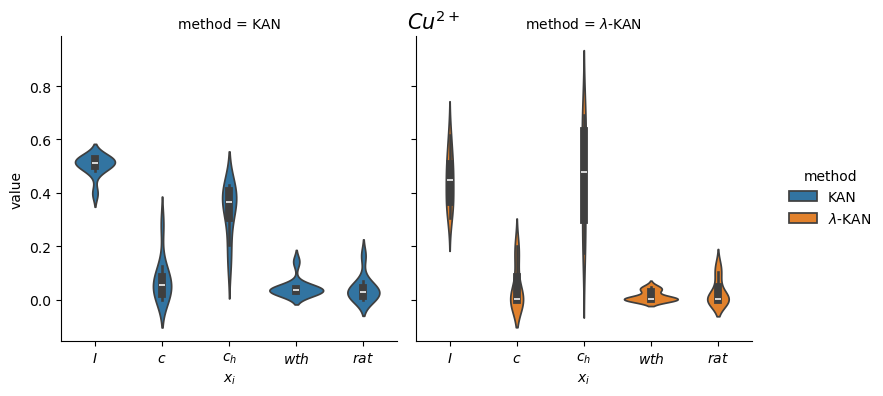

In [3]:
l_feature_scores_kan = np.array([[2.1291368e+00, 2.1175659e-01, 1.5618247e+00, 1.5060765e-01,
        1.0661014e-01],
       [2.1249735e+00, 4.1943844e-02, 1.6760435e+00, 1.2519021e-01,
        2.9966533e-02],
       [2.1311347e+00, 3.3532519e-02, 1.6775979e+00, 1.5092435e-01,
        5.7683070e-03],
       [2.1198771e+00, 3.0034220e-05, 1.7225298e+00, 1.5773945e-01,
        2.1011892e-03],
       [2.1579247e+00, 2.4678892e-01, 1.5927402e+00, 1.9214243e-01,
        1.2545964e-01],
       [2.1212373e+00, 2.2659884e-01, 1.4840105e+00, 1.5595305e-01,
        1.2876241e-01],
       [2.0925326e+00, 5.5121779e-01, 1.2677362e+00, 1.2669952e-01,
        3.1008142e-01],
       [2.0266371e+00, 3.4694958e-01, 8.0291104e-01, 5.5638707e-01,
        1.6859689e-01],
       [2.1199179e+00, 3.3413339e-01, 1.4657199e+00, 1.3243867e-01,
        1.9020963e-01],
       [2.1446881e+00, 1.5181991e+00, 6.9600850e-01, 1.3851079e-01,
        8.8706738e-01]])

l_feature_scores_kan = np.abs(l_feature_scores_kan)
l_feature_scores_kan = l_feature_scores_kan/l_feature_scores_kan.sum(axis=1, keepdims=True)


l_feature_scores_lmdkan = np.array([[ 1.71451187e+00,  6.36252940e-01,  8.06422830e-01,
        -2.83168498e-02,  3.68855715e-01],
       [ 1.71748531e+00,  7.66426682e-01,  6.72685087e-01,
        -1.80470139e-01,  4.86496091e-01],
       [ 1.38403833e+00, -3.83677776e-04,  2.41960382e+00,
         5.81931230e-03, -1.08130299e-03],
       [ 1.36698723e+00,  3.46609158e-06,  1.00421047e+00,
        -9.95454565e-02,  2.57619598e-04],
       [ 1.61804092e+00,  3.53234917e-01,  8.51480365e-01,
        -1.08191356e-01,  1.96136370e-01],
       [ 9.08916771e-01, -1.66416270e-04,  2.04246950e+00,
        -5.20679168e-05, -3.93129187e-03],
       [ 1.31813550e+00,  4.47474374e-03,  2.21377778e+00,
         5.14839310e-04, -2.31943629e-03],
       [ 1.60248685e+00,  4.36162623e-03,  9.78168905e-01,
        -3.18350620e-03, -4.41343943e-03],
       [ 1.34086943e+00,  1.13479304e-03,  1.64130962e+00,
        -7.15742260e-03,  4.07861965e-03],
       [ 9.26575899e-01, -1.73917308e-03,  1.70417786e+00,
        -4.22996609e-03, -2.13546227e-04]])

l_feature_scores_lmdkan = np.abs(l_feature_scores_lmdkan)
l_feature_scores_lmdkan = l_feature_scores_lmdkan/l_feature_scores_lmdkan.sum(axis=1, keepdims=True)


df_kan = get_df4bar(l_feature_scores_kan, method_name='KAN')
df_lmdkan = get_df4bar(l_feature_scores_lmdkan, method_name='$\lambda$-KAN')
df_all = pd.concat([df_kan, df_lmdkan])

cat = sns.catplot(
df_all, kind='violin',#"bar",capsize=0.2,
x="$x_i$", y="value", col="method", hue="method", 
height=4,
aspect=1.,
margin_titles=True)

cat.figure.suptitle('$Cu^{2+}$', size=15)
plt.show()
plt.close()

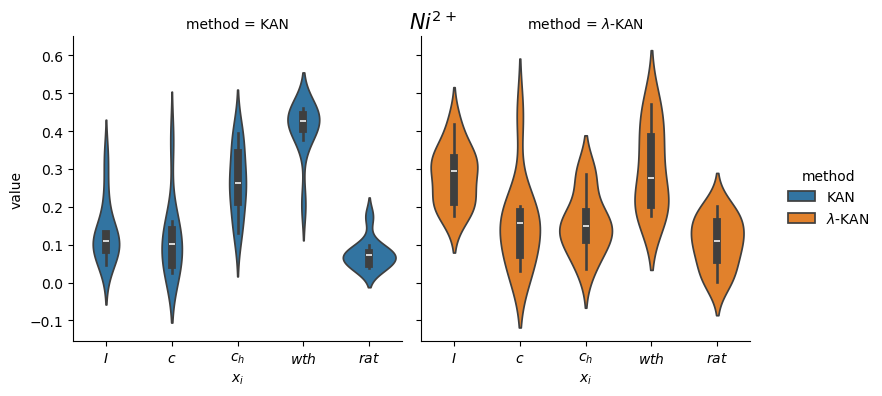

In [4]:
l_feature_scores_kan = np.array([[0.8242804 , 0.2088687 , 2.7461007 , 3.4077544 , 0.48509154],
       [0.6590068 , 0.7298004 , 1.2939245 , 1.9220212 , 0.5097812 ],
       [0.7335816 , 0.371106  , 3.4367971 , 4.1438785 , 0.39630798],
       [0.69151396, 0.21299449, 3.4875302 , 4.064957  , 0.36989763],
       [1.367544  , 0.27303246, 0.5470965 , 1.840152  , 0.15832259],
       [1.0228039 , 0.8573735 , 2.1816459 , 3.3895907 , 0.57979256],
       [0.6931571 , 1.0178322 , 1.5589268 , 2.5025585 , 0.46773762],
       [0.8410909 , 0.78316534, 2.4015381 , 3.5597126 , 0.62781304],
       [0.23846999, 1.9619398 , 1.0462979 , 1.0784805 , 0.9152143 ],
       [1.1786    , 0.71204257, 0.83688635, 2.2503898 , 0.41834828]])

l_feature_scores_kan = np.abs(l_feature_scores_kan)
l_feature_scores_kan = l_feature_scores_kan/l_feature_scores_kan.sum(axis=1, keepdims=True)


l_feature_scores_lmdkan = np.array([[ 0.68282855,  0.44926488,  0.27478558,  0.4085596 ,  0.39371428],
       [ 1.1707137 ,  0.6808347 ,  0.68122214,  0.9278838 ,  0.694648  ],
       [ 0.7370137 , -0.12334109, -0.3098042 ,  0.84532547, -0.10786351],
       [ 1.1254073 ,  0.50295573,  0.5066379 ,  0.76090777,  0.45438045],
       [ 1.0129839 ,  0.560132  , -0.3575885 ,  1.0758177 ,  0.2957031 ],
       [ 0.17416929,  0.4361845 , -0.0773776 ,  0.17371461,  0.12585276],
       [ 0.46959576,  0.06888656, -0.6317862 ,  1.0437175 ,  0.00172484],
       [ 1.3223679 ,  0.35429358, -0.11297651,  1.0854554 ,  0.28208238],
       [ 0.9545331 ,  0.86030596,  0.8566723 ,  0.8842592 ,  0.9030172 ],
       [ 0.56272465,  0.10445878, -0.77287096,  1.2185019 ,  0.03843729]])

l_feature_scores_lmdkan = np.abs(l_feature_scores_lmdkan)
l_feature_scores_lmdkan = l_feature_scores_lmdkan/l_feature_scores_lmdkan.sum(axis=1, keepdims=True)


df_kan = get_df4bar(l_feature_scores_kan, method_name='KAN')
df_lmdkan = get_df4bar(l_feature_scores_lmdkan, method_name='$\lambda$-KAN')
df_all = pd.concat([df_kan, df_lmdkan])

cat = sns.catplot(
df_all, kind='violin',#"bar",capsize=0.2,
x="$x_i$", y="value", col="method", hue="method", 
height=4,
aspect=1.,
margin_titles=True)

cat.figure.suptitle('$Ni^{2+}$', size=15)
plt.show()
plt.close()

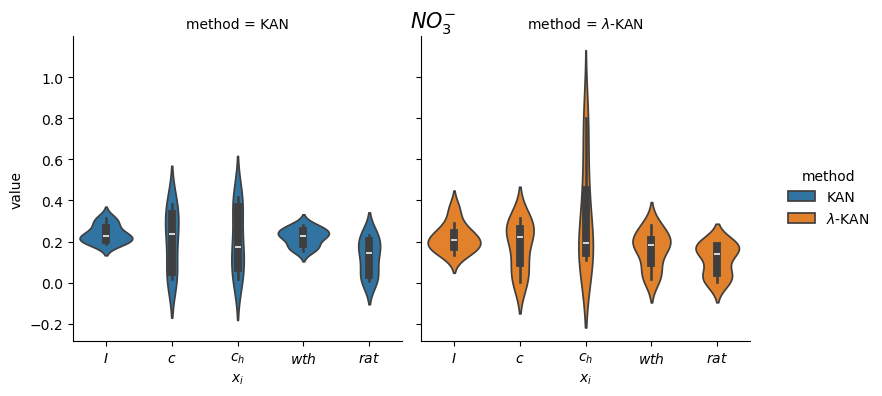

In [5]:
l_feature_scores_kan = np.array([[0.6660483 , 0.89058536, 0.52169734, 0.77374303, 0.54338783],
       [0.6365673 , 1.1213423 , 0.14515768, 0.5489742 , 0.68722105],
       [0.6482108 , 0.05637438, 0.79540104, 0.50786966, 0.05210825],
       [0.6334796 , 0.6129284 , 0.542692  , 0.6172237 , 0.3721148 ],
       [0.68988085, 0.78147465, 0.44324812, 0.6875848 , 0.46293673],
       [0.68896353, 0.03637237, 0.9331411 , 0.62131053, 0.03486218],
       [0.6647179 , 0.04985137, 1.0113858 , 0.67727524, 0.01516455],
       [0.6184607 , 1.2316643 , 0.11419614, 0.58380663, 0.7437118 ],
       [0.61645293, 0.31065243, 0.7762018 , 0.6362794 , 0.18399721],
       [0.6464943 , 1.1492331 , 0.04974672, 0.46899465, 0.6916724 ]])

l_feature_scores_kan = np.abs(l_feature_scores_kan)
l_feature_scores_kan = l_feature_scores_kan/l_feature_scores_kan.sum(axis=1, keepdims=True)


l_feature_scores_lmdkan = np.array([[-1.9349512e+00,  3.0305810e+00,  1.0926901e+00, -2.0260363e+00,
         1.8585087e+00],
       [ 6.9445610e-01, -1.4852418e-03,  2.2595079e+00,  1.1602950e-01,
        -3.5871223e-02],
       [-2.4327745e+00,  2.7595682e+00,  1.5109520e+00, -1.9804192e+00,
         1.8613700e+00],
       [-5.4506516e+00,  3.4149394e+00,  2.9720407e+00, -1.1326404e+00,
         2.0665648e+00],
       [-1.0228932e+00,  1.8718528e+00,  6.6821849e-01, -1.2345060e+00,
         1.1233964e+00],
       [-3.5122907e+00,  3.7047544e+00,  2.1295457e+00, -2.5973294e+00,
         2.5617616e+00],
       [-3.8749499e+00,  2.8971598e+00,  2.4291835e+00, -2.1282730e+00,
         1.9180022e+00],
       [ 4.8634937e-01,  8.7774266e-03,  2.2197316e+00, -4.6054747e-02,
        -1.0848469e-03],
       [-1.1717534e+00,  6.6836220e-01,  3.0320444e+00, -2.0009215e+00,
         3.0628347e-01],
       [-1.1570495e+00,  8.0548692e-01,  3.9901915e+00, -2.2685077e+00,
         4.3749341e-01]])

l_feature_scores_lmdkan = np.abs(l_feature_scores_lmdkan)
l_feature_scores_lmdkan = l_feature_scores_lmdkan/l_feature_scores_lmdkan.sum(axis=1, keepdims=True)


df_kan = get_df4bar(l_feature_scores_kan, method_name='KAN')
df_lmdkan = get_df4bar(l_feature_scores_lmdkan, method_name='$\lambda$-KAN')
df_all = pd.concat([df_kan, df_lmdkan])

cat = sns.catplot(
df_all, kind='violin',#"bar",capsize=0.2,
x="$x_i$", y="value", col="method", hue="method", 
height=4,
aspect=1.,
margin_titles=True)

cat.figure.suptitle('$NO_3^{-}$', size=15)
plt.show()
plt.close()